<a href="https://colab.research.google.com/github/Dhaarani13/Project/blob/main/preprocessing%26EDA_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
#importing the necessary libraries
import kagglehub
import os
import cv2
import matplotlib.pyplot as plt
import random
import numpy as np
# Progress bar for large datasets
from tqdm import tqdm
import tensorflow as tf

In [30]:
# Download latest version
path = kagglehub.dataset_download("grassknoted/asl-alphabet")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/asl-alphabet


In [31]:
# Listing the directories in the path in a list

dataset_path = "/kaggle/input/asl-alphabet"
print("Dataset files:", os.listdir(dataset_path))

Dataset files: ['asl_alphabet_test', 'asl_alphabet_train']


In [32]:
# Listing the classes in asl_alphabet_train

train_path = os.path.join(dataset_path, "asl_alphabet_train" , "asl_alphabet_train")
classes = os.listdir(train_path)

print("classes in dataset:", classes)
print("Total classes:", len(classes))

classes in dataset: ['N', 'R', 'space', 'B', 'I', 'del', 'F', 'H', 'E', 'U', 'M', 'X', 'K', 'Q', 'Y', 'S', 'G', 'A', 'O', 'T', 'V', 'Z', 'C', 'P', 'L', 'W', 'D', 'nothing', 'J']
Total classes: 29


classes in dataset: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']
Total classes: 29


Processing classes: 100%|██████████| 29/29 [00:05<00:00,  5.08it/s]


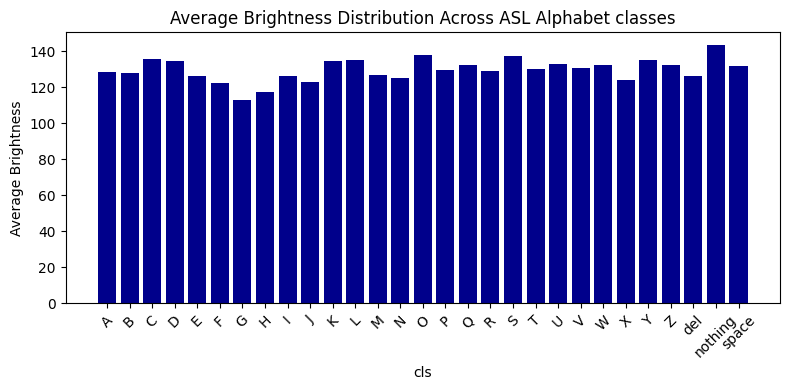

In [33]:
#Code to show Average brightness distribution across the dataset.

# Define dataset path
dataset_path = "/kaggle/input/asl-alphabet"
train_path = os.path.join(dataset_path, "asl_alphabet_train", "asl_alphabet_train")

# List classes
classes = sorted(os.listdir(train_path))
print("classes in dataset:", classes)
print("Total classes:", len(classes))

# Initialize dictionary to store brightness values
brightness_dict = {cls: [] for cls in classes}

# Loop through each cls and calculate brightness
for cls in tqdm(classes, desc="Processing classes"):
    cls_path = os.path.join(train_path, cls)
    image_files = os.listdir(cls_path)

    # Limit to a sample if dataset is large
    for img_file in image_files[:100]:
        img_path = os.path.join(cls_path, img_file)
        img = cv2.imread(img_path)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        brightness = np.mean(gray)
        brightness_dict[cls].append(brightness)

# Compute average brightness per cls
avg_brightness = {cls: np.mean(vals) for cls, vals in brightness_dict.items()}

# Plot brightness distribution
plt.figure(figsize=(8, 4))
plt.bar(avg_brightness.keys(), avg_brightness.values(), color='darkblue')
plt.xticks(rotation=45)
plt.xlabel('cls')
plt.ylabel('Average Brightness')
plt.title('Average Brightness Distribution Across ASL Alphabet classes')
plt.tight_layout()
plt.savefig('bright.png', dpi=300, bbox_inches='tight')
plt.show()


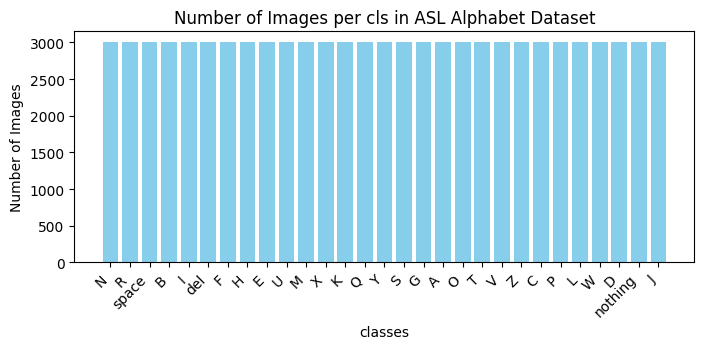

In [34]:
# Path to training dataset
train_path = os.path.join(dataset_path, "asl_alphabet_train", "asl_alphabet_train")

# Getting the cls names
classes = os.listdir(train_path)

# Counting the number of images in each cls
cls_counts = {cls: len(os.listdir(os.path.join(train_path, cls))) for cls in classes}

# Sort by count
cls_counts = dict(sorted(cls_counts.items(), key=lambda x: x[1], reverse=True))

# Plot the bar graph
plt.figure(figsize=(8, 3))
plt.bar(cls_counts.keys(), cls_counts.values(), color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.xlabel("classes")
plt.ylabel("Number of Images")
plt.title("Number of Images per cls in ASL Alphabet Dataset")


# Show the plot
plt.show()


classes in dataset: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']
Total classes: 29


Processing classes for contrast: 100%|██████████| 29/29 [00:05<00:00,  5.28it/s]


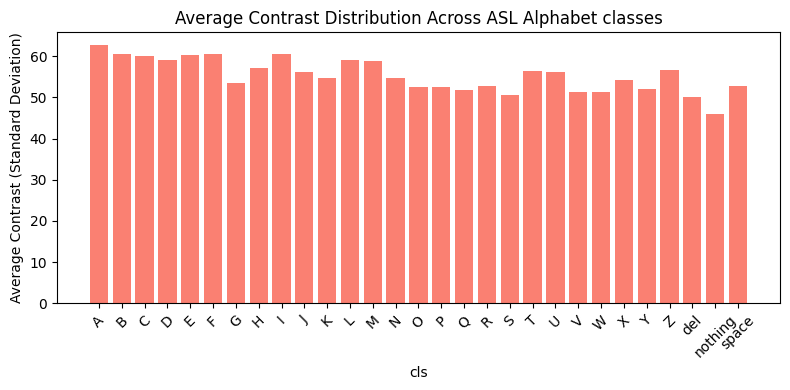

In [41]:
# Define dataset path
dataset_path = "/kaggle/input/asl-alphabet"
train_path = os.path.join(dataset_path, "asl_alphabet_train", "asl_alphabet_train")

# List classes
classes = sorted(os.listdir(train_path))
print("classes in dataset:", classes)
print("Total classes:", len(classes))

# Initialize dictionary to store contrast values
contrast_dict = {cls: [] for cls in classes}

# Loop through each cls and calculate contrast (standard deviation)
for cls in tqdm(classes, desc="Processing classes for contrast"):
    cls_path = os.path.join(train_path, cls)
    image_files = os.listdir(cls_path)


    # Limit to a sample if dataset is large
    for img_file in image_files[:100]:
        img_path = os.path.join(cls_path, img_file)
        img = cv2.imread(img_path)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        contrast = np.std(gray)
        contrast_dict[cls].append(contrast)

# Computing average contrast per cls
avg_contrast = {cls: np.mean(vals) for cls, vals in contrast_dict.items()}

# Plot contrast distribution graph
plt.figure(figsize=(8, 4))
plt.bar(avg_contrast.keys(), avg_contrast.values(), color='salmon')
plt.xticks(rotation=45)
plt.xlabel('cls')
plt.ylabel('Average Contrast (Standard Deviation)')
plt.title('Average Contrast Distribution Across ASL Alphabet classes')
plt.tight_layout()
plt.show()


classes in dataset: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']
Total classes: 29


Processing classes for sharpness: 100%|██████████| 29/29 [00:05<00:00,  4.89it/s]


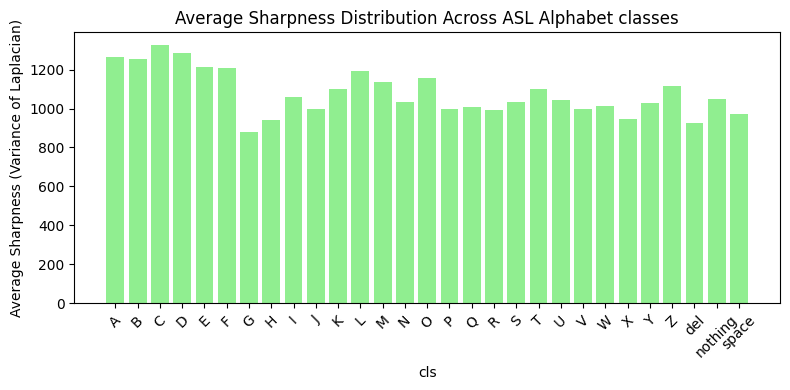

In [36]:
# Define dataset path
dataset_path = "/kaggle/input/asl-alphabet"
train_path = os.path.join(dataset_path, "asl_alphabet_train", "asl_alphabet_train")

# List classes
classes = sorted(os.listdir(train_path))
print("classes in dataset:", classes)
print("Total classes:", len(classes))

# Initialize dictionary to store sharpness values
sharpness_dict = {cls: [] for cls in classes}

# Loop through each cls and calculate sharpness
for cls in tqdm(classes, desc="Processing classes for sharpness"):
    cls_path = os.path.join(train_path, cls)
    image_files = os.listdir(cls_path)

    # Limit to a sample if dataset is large
    for img_file in image_files[:100]:
        img_path = os.path.join(cls_path, img_file)
        img = cv2.imread(img_path)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Sharpness as variance of Laplacian
        laplacian_var = cv2.Laplacian(gray, cv2.CV_64F).var()
        sharpness_dict[cls].append(laplacian_var)

# Compute average sharpness per cls
avg_sharpness = {cls: np.mean(vals) for cls, vals in sharpness_dict.items()}

# Plot sharpness distribution
plt.figure(figsize=(8, 4))
plt.bar(avg_sharpness.keys(), avg_sharpness.values(), color='lightgreen')
plt.xticks(rotation=45)
plt.xlabel('cls')
plt.ylabel('Average Sharpness (Variance of Laplacian)')
plt.title('Average Sharpness Distribution Across ASL Alphabet classes')
plt.tight_layout()
plt.show()


/kaggle/input/asl-alphabet/asl_alphabet_train/asl_alphabet_train/E/E1162.jpg
/kaggle/input/asl-alphabet/asl_alphabet_train/asl_alphabet_train/M/M2039.jpg
/kaggle/input/asl-alphabet/asl_alphabet_train/asl_alphabet_train/Q/Q57.jpg
/kaggle/input/asl-alphabet/asl_alphabet_train/asl_alphabet_train/K/K1336.jpg
/kaggle/input/asl-alphabet/asl_alphabet_train/asl_alphabet_train/T/T288.jpg


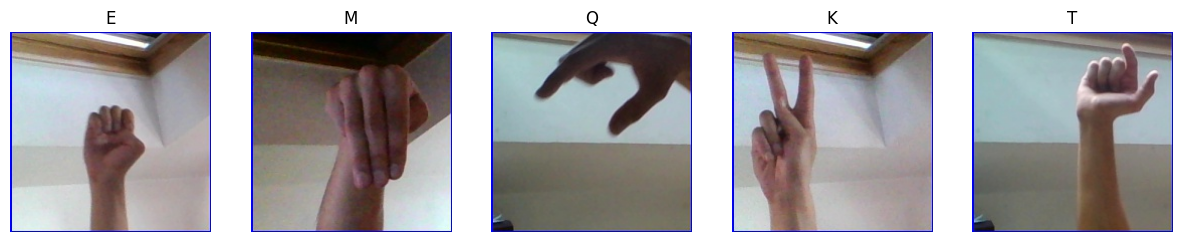

In [37]:
#function to show random sample images in the dataset and its classes
def show_sample_images(train_path, num_images=5):

    classes = os.listdir(train_path)

    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))

    for i in range(num_images):
        cls_name = random.choice(classes)
        cls_path = os.path.join(train_path, cls_name)
        image_name = random.choice(os.listdir(cls_path))
        image_path = os.path.join(cls_path, image_name)
        print(image_path)
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        axes[i].imshow(img)
        axes[i].set_title(cls_name)
        axes[i].axis("off")

    plt.show()

# Full path to the data set
dataset_path = "/kaggle/input/asl-alphabet/asl_alphabet_train/asl_alphabet_train"
#Calling the function
show_sample_images(dataset_path)

In [38]:

# Define paths
input_dir = "/kaggle/input/asl-alphabet/asl_alphabet_train/asl_alphabet_train/"
output_dir = "/root/.cache/kagglehub/datasets/processed_asl_alphabet/"

# Create output directory if it does not exist
os.makedirs(output_dir, exist_ok=True)

# Set target image size
IMG_SIZE = (100, 100)

# Function to preprocess images
def preprocess_images(input_dir, output_dir):
    for category in tqdm(os.listdir(input_dir)):  # Loop through A-Z, 0-9, etc.
        category_path = os.path.join(input_dir, category)
        output_category_path = os.path.join(output_dir, category)

        if not os.path.isdir(category_path):
            continue  # Skip if it's not a directory

        os.makedirs(output_category_path, exist_ok=True)  # Create category folder in output

        for img_name in os.listdir(category_path):
            img_path = os.path.join(category_path, img_name)
            img = cv2.imread(img_path)  # Load image

            if img is None:
                continue  # Skip unreadable images

            img = cv2.resize(img, IMG_SIZE)  # Resize to 50x50

            img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale

            # Apply binary thresholding for better hand detection
            _, img_thresh = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)

            # Normalize pixel values (convert to float between 0 and 1)
            img_normalized = img_thresh / 255.0

            # Save preprocessed image
            save_path = os.path.join(output_category_path, img_name)
            cv2.imwrite(save_path, (img_normalized * 255).astype(np.uint8))  # Convert back to uint8

# Run preprocessing
preprocess_images(input_dir, output_dir)

print("Preprocessing completed. Saved in:", output_dir)



100%|██████████| 29/29 [04:38<00:00,  9.62s/it]

Preprocessing completed. Saved in: /root/.cache/kagglehub/datasets/processed_asl_alphabet/


In [39]:
preprocessed = "/root/.cache/kagglehub/datasets/processed_asl_alphabet/"
print("Dataset files:", os.listdir(preprocessed))

Dataset files: ['V', 'M', 'L', 'K', 'del', 'T', 'B', 'J', 'W', 'O', 'nothing', 'U', 'S', 'X', 'G', 'Y', 'H', 'space', 'Q', 'Z', 'A', 'P', 'R', 'D', 'C', 'I', 'N', 'E', 'F']


/root/.cache/kagglehub/datasets/processed_asl_alphabet/Y/Y2533.jpg
/root/.cache/kagglehub/datasets/processed_asl_alphabet/B/B1876.jpg
/root/.cache/kagglehub/datasets/processed_asl_alphabet/D/D1214.jpg
/root/.cache/kagglehub/datasets/processed_asl_alphabet/P/P2859.jpg
/root/.cache/kagglehub/datasets/processed_asl_alphabet/J/J1449.jpg


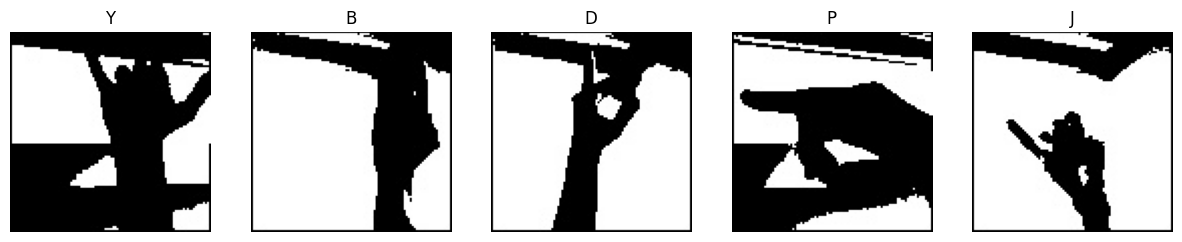

In [40]:
#function to show random sample images in the dataset and its classes
def show_sample_images(train_path, num_images=5):

    classes = os.listdir(train_path)

    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))

    for i in range(num_images):
        cls_name = random.choice(classes)
        cls_path = os.path.join(train_path, cls_name)
        image_name = random.choice(os.listdir(cls_path))
        image_path = os.path.join(cls_path, image_name)
        print(image_path)
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        axes[i].imshow(img)
        axes[i].set_title(cls_name)
        axes[i].axis("off")

    plt.show()

# Full path to the data set
dataset_path = "/root/.cache/kagglehub/datasets/processed_asl_alphabet/"
#Calling the function
show_sample_images(dataset_path)